In [413]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

In [414]:
import numpy as np
df222 = pd.read_csv("dataset.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [415]:
#check for imbalance target data
df["Target"].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

In [416]:
from sklearn.utils import resample
df_mij=df[df['Target']==0]
df_min=df[df['Target']==1]

resampled_data = resample(df_mij, n_samples=int(1.5*len(df_min)), random_state=200)

print(type(resampled_data))

<class 'pandas.core.frame.DataFrame'>


In [417]:
print(type(resampled_data))
df2=pd.concat([resampled_data,df_min])
df2.head()

<class 'pandas.core.frame.DataFrame'>


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
2093,5035848,1,0,1,0,0,0,1,0,1,14,46948.5,57.953278,0.000000,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Other,0
887,5023900,0,0,1,0,0,0,0,0,2,13,225000.0,26.968384,0.673525,Commercial associate,Higher education,Married,House / apartment,Other,0
9540,5149952,0,0,1,0,0,0,0,1,3,55,67500.0,29.525589,6.877622,Commercial associate,Higher education,Married,House / apartment,Core staff,0
8843,5139739,1,0,1,0,1,1,0,0,2,6,202500.0,26.481037,7.266405,Working,Higher education,Married,With parents,Other,0
1034,5024663,0,0,1,1,1,0,0,0,2,28,157500.0,39.494309,12.506759,Working,Secondary / secondary special,Married,House / apartment,Laborers,0


In [418]:
df2["Target"].value_counts()

Target
0    1924
1    1283
Name: count, dtype: int64

In [419]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3207 entries, 2093 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3207 non-null   int64  
 1   Gender           3207 non-null   int64  
 2   Own_car          3207 non-null   int64  
 3   Own_property     3207 non-null   int64  
 4   Work_phone       3207 non-null   int64  
 5   Phone            3207 non-null   int64  
 6   Email            3207 non-null   int64  
 7   Unemployed       3207 non-null   int64  
 8   Num_children     3207 non-null   int64  
 9   Num_family       3207 non-null   int64  
 10  Account_length   3207 non-null   int64  
 11  Total_income     3207 non-null   float64
 12  Age              3207 non-null   float64
 13  Years_employed   3207 non-null   float64
 14  Income_type      3207 non-null   object 
 15  Education_type   3207 non-null   object 
 16  Family_status    3207 non-null   object 
 17  Housing_type    

In [420]:
df2.shape

(3207, 20)

In [421]:
#any missing values?
df2.count()

ID                 3207
Gender             3207
Own_car            3207
Own_property       3207
Work_phone         3207
Phone              3207
Email              3207
Unemployed         3207
Num_children       3207
Num_family         3207
Account_length     3207
Total_income       3207
Age                3207
Years_employed     3207
Income_type        3207
Education_type     3207
Family_status      3207
Housing_type       3207
Occupation_type    3207
Target             3207
dtype: int64

In [422]:
#drop duplicates
df2.drop_duplicates(inplace=True)
#check row count after dropping duplicates
df2.count()

ID                 2994
Gender             2994
Own_car            2994
Own_property       2994
Work_phone         2994
Phone              2994
Email              2994
Unemployed         2994
Num_children       2994
Num_family         2994
Account_length     2994
Total_income       2994
Age                2994
Years_employed     2994
Income_type        2994
Education_type     2994
Family_status      2994
Housing_type       2994
Occupation_type    2994
Target             2994
dtype: int64

In [423]:
#check if any of the cells is blank or na
if df2.isna().any().any():
    print("Datafrme containst blank cells (NA)")
else:
    print("Dataframe does not contain blank cells (NA)")

if df2.isnull().any().any():
    print("Datafrme containst blank cells (Null)")
else:
    print("Dataframe does not contain blank cells (Null)")

Dataframe does not contain blank cells (NA)
Dataframe does not contain blank cells (Null)


Corrleation Matrix
                 Target    Gender    Own_car  Own_property  Unemployed  \
Target          1.000000  0.016969 -0.027613   -0.048448    -0.024114    
Gender          0.016969  1.000000  0.350730   -0.072490    -0.157615    
Own_car        -0.027613  0.350730  1.000000   -0.018994    -0.143284    
Own_property   -0.048448 -0.072490 -0.018994    1.000000     0.072440    
Unemployed     -0.024114 -0.157615 -0.143284    0.072440     1.000000    
Num_children    0.016288  0.045491  0.088701   -0.000519    -0.227515    
Num_family      0.006111  0.068480  0.141568    0.007093    -0.215800    
Account_length  0.135972 -0.009704  0.029103   -0.024356     0.018400    
Total_income    0.023827  0.198959  0.247500    0.021793    -0.163422    
Age            -0.041590 -0.156562 -0.111942    0.123989     0.603615    
Years_employed -0.011682 -0.047899  0.010214    0.002447    -0.394889    

                Num_children  Num_family  Account_length  Total_income  \
Target            

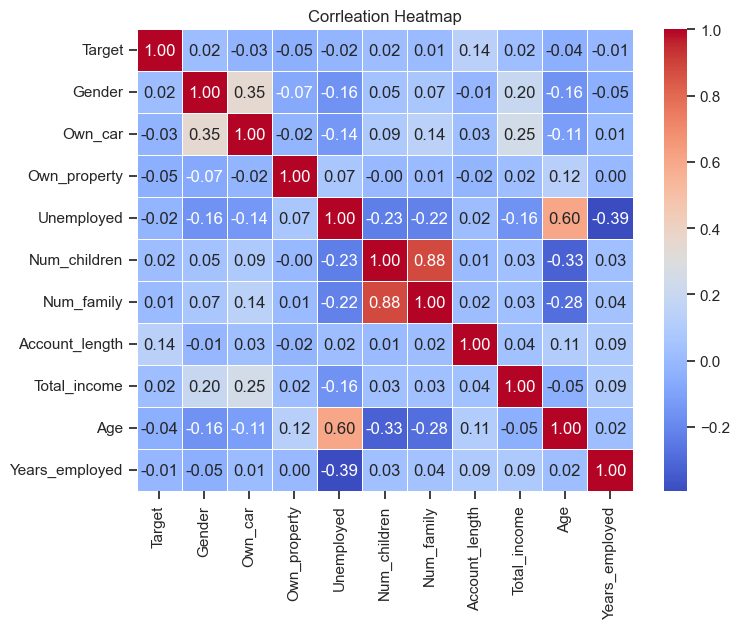


 Correlation Coefficients
Target vs Gender 0.02
Target vs Own_car -0.03
Target vs Own_property -0.05
Target vs Unemployed -0.02
Target vs Num_children 0.02
Target vs Num_family 0.01
Target vs Account_length 0.14
Target vs Total_income 0.02
Target vs Age -0.04
Target vs Years_employed -0.01


In [424]:
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
from scipy.stats import norm

#Calulate Correlation Matrix
subset_df = df2[['Target','Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children','Num_family','Account_length','Total_income','Age','Years_employed']]
correlation_matrix = subset_df.corr()
#print correlation matrix
print("Corrleation Matrix")
print (correlation_matrix)

#plot correlation heatmap
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)

#heatmap.set_aspect('equal', adjustable ='box')

plt.title("Corrleation Heatmap")
plt.show()

# #Print Corrleation coefficients
print("\n Correlation Coefficients")
print("Target vs Gender", "{:.2f}".format(correlation_matrix.loc['Target', 'Gender']))
print("Target vs Own_car","{:.2f}".format (correlation_matrix.loc['Target', 'Own_car']))
print("Target vs Own_property", "{:.2f}".format(correlation_matrix.loc['Target', 'Own_property']))
print("Target vs Unemployed", "{:.2f}".format(correlation_matrix.loc['Target', 'Unemployed']))
print("Target vs Num_children", "{:.2f}".format(correlation_matrix.loc['Target', 'Num_children']))
print("Target vs Num_family", "{:.2f}".format(correlation_matrix.loc['Target', 'Num_family']))
print("Target vs Account_length", "{:.2f}".format(correlation_matrix.loc['Target', 'Account_length']))
print("Target vs Total_income", "{:.2f}".format(correlation_matrix.loc['Target', 'Total_income']))
print("Target vs Age", "{:.2f}".format(correlation_matrix.loc['Target', 'Age']))
print("Target vs Years_employed", "{:.2f}".format(correlation_matrix.loc['Target', 'Years_employed']))

1.0 to 0.8: Very strong positive correlation

0.8 to 0.6: Strong positive correlation

0.6 to 0.4: Moderate positive correlation

0.4 to 0.2: Weak positive correlation

0.2 to 0.0: Very weak positive correlation

0.0: No correlation

0.0 to -0.2: Very weak negative correlation

-0.2 to -0.4: Weak negative correlation

-0.4 to -0.6: Moderate negative correlation

-0.6 to -0.8: Strong negative correlation

-0.8 to -1.0: Very strong negative correlation

In [425]:
# #%matplotlib inline
# import os
# from autoviz.AutoViz_Class import AutoViz_Class
# # Define the AutoViz class
# AV = AutoViz_Class()

# # Path to the dataset

# dataset_path = 'dataset.csv'
# # Generate visualizations
# dft = AV.AutoViz(dataset_path)



In [426]:
# AutoViz for all columns
# %matplotlib inline
# _ = AV.AutoViz(dataset_path)

Shape of your Data Set loaded: (9709, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 50 dupl

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Unemployed,int64,0.000000,0,0.000000,1.000000,No issue
Num_children,int64,0.000000,0,0.000000,19.000000,Column has 150 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.000000,0,1.000000,20.000000,"Column has 140 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."
Age,float64,0.000000,NA,20.504186,68.863837,No issue
Total_income,float64,0.000000,NA,27000.000000,1575000.000000,Column has 318 outliers greater than upper bound (393750.00) or lower than lower bound(-56250.00). Cap them or remove them.
Target,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 3


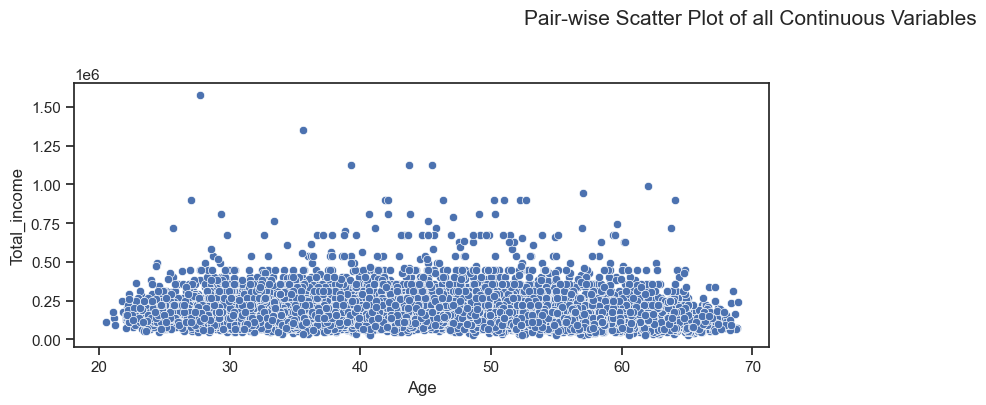

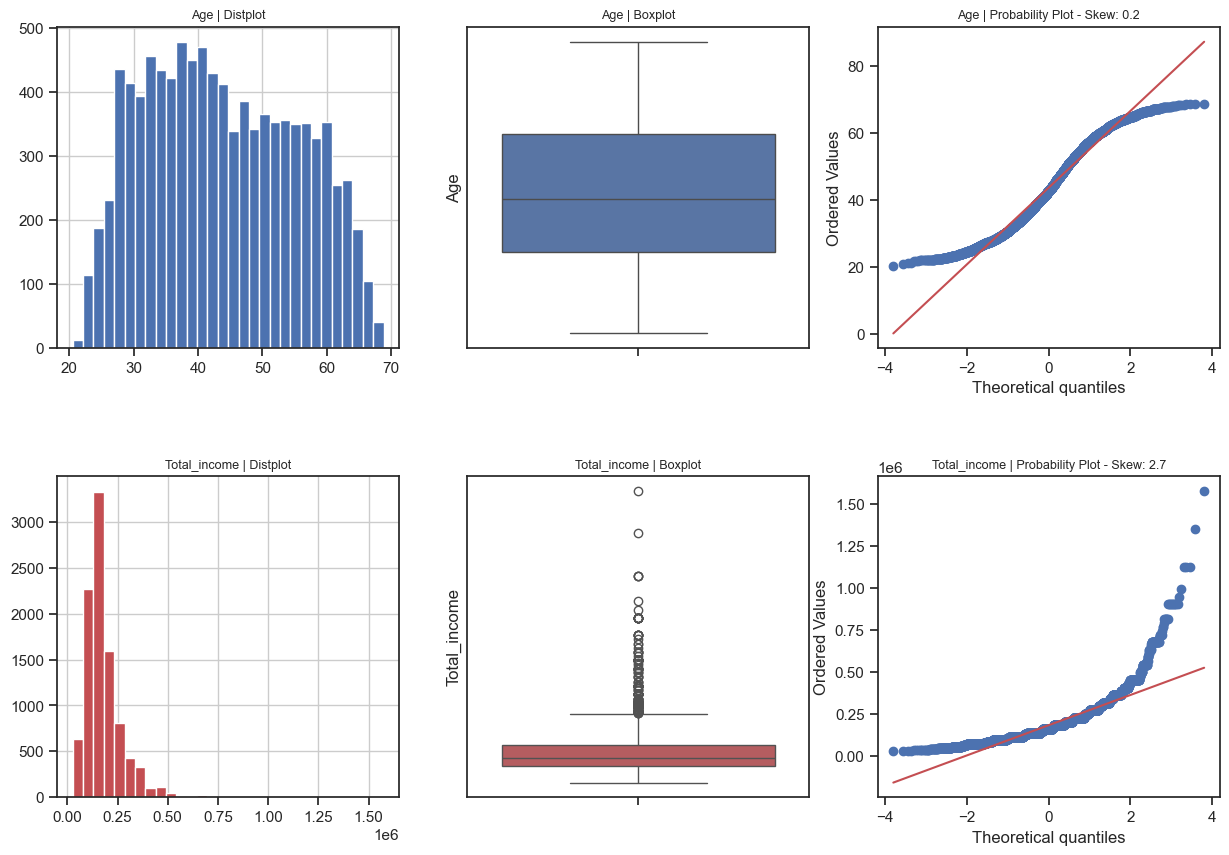

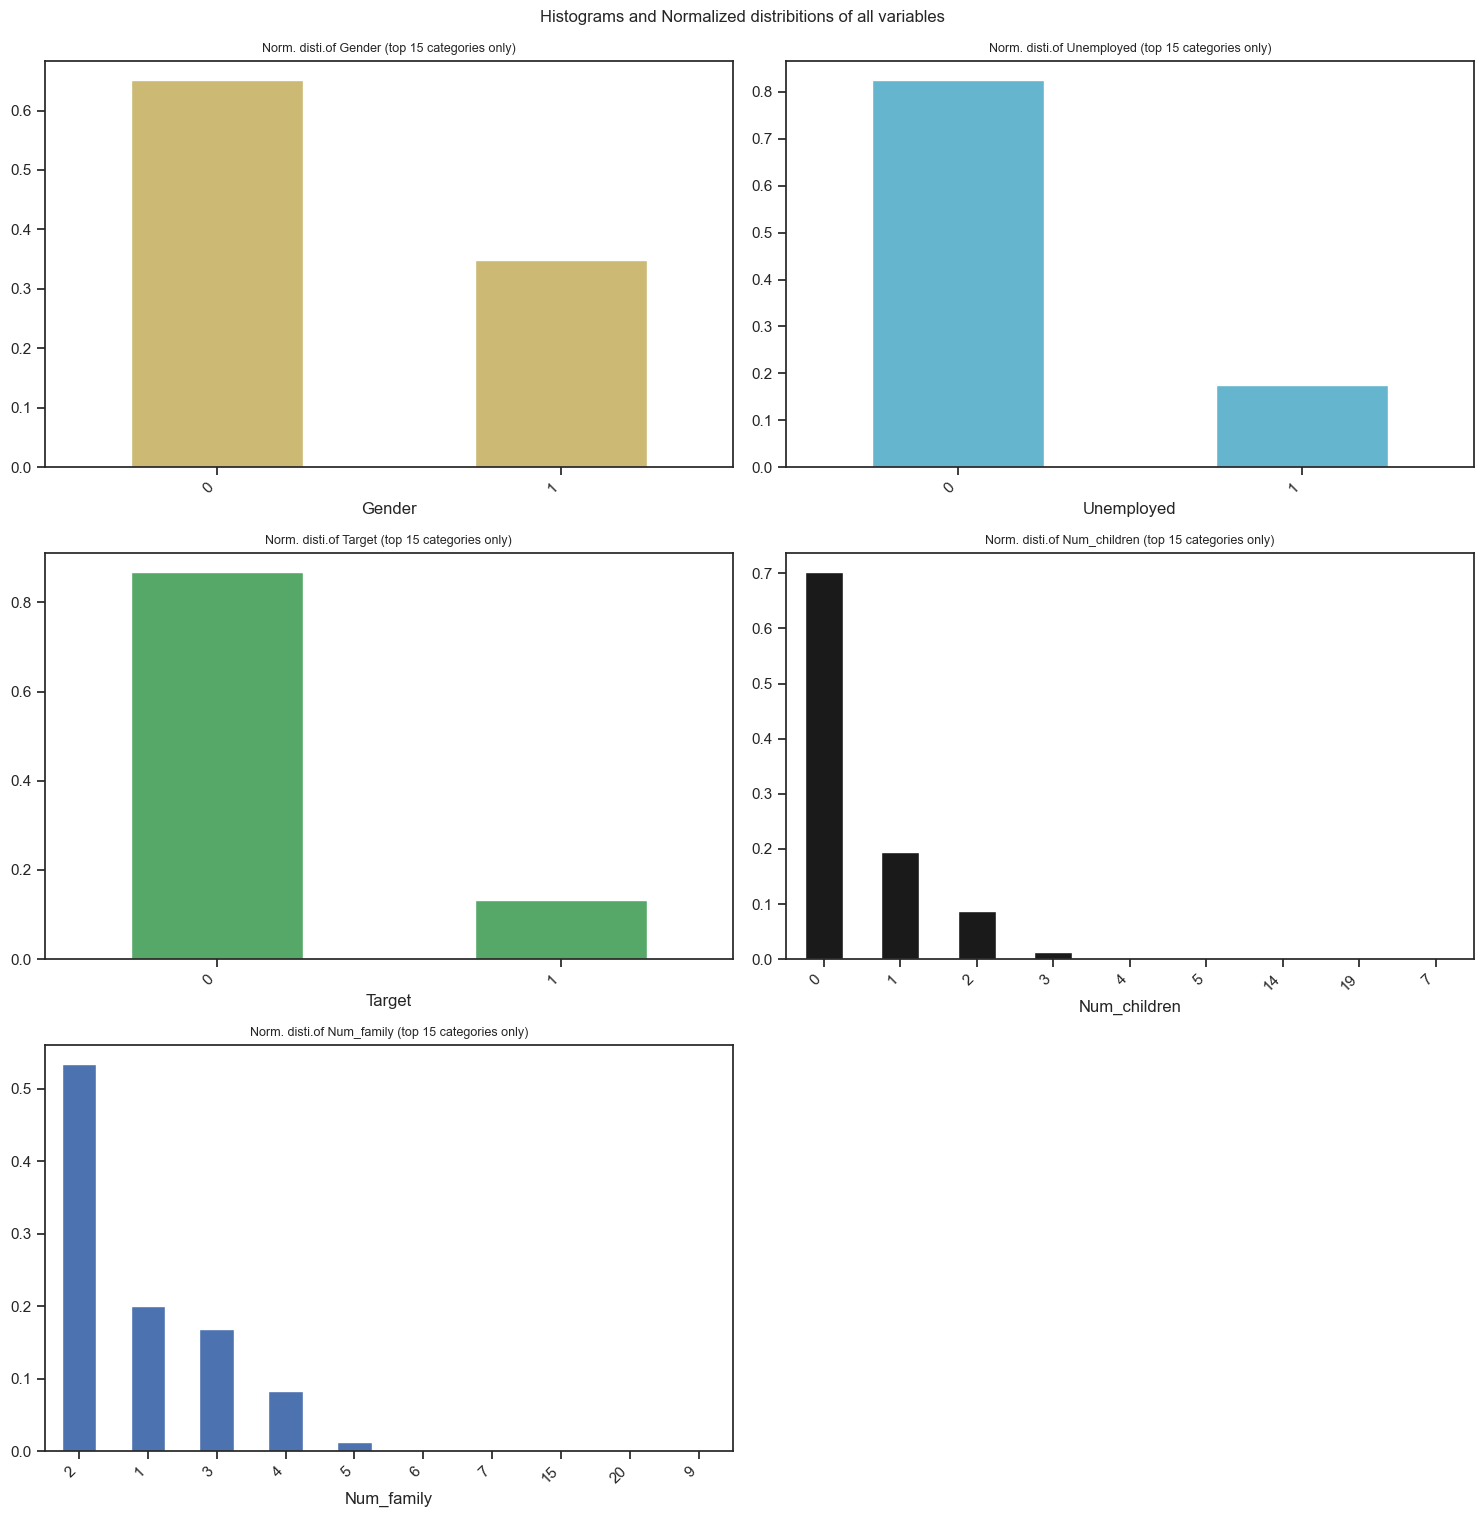

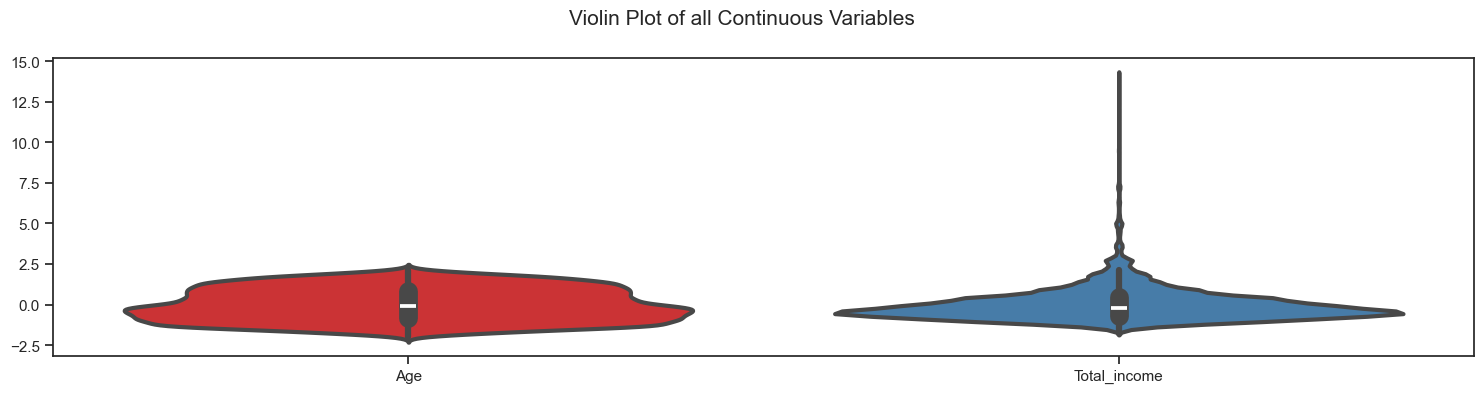

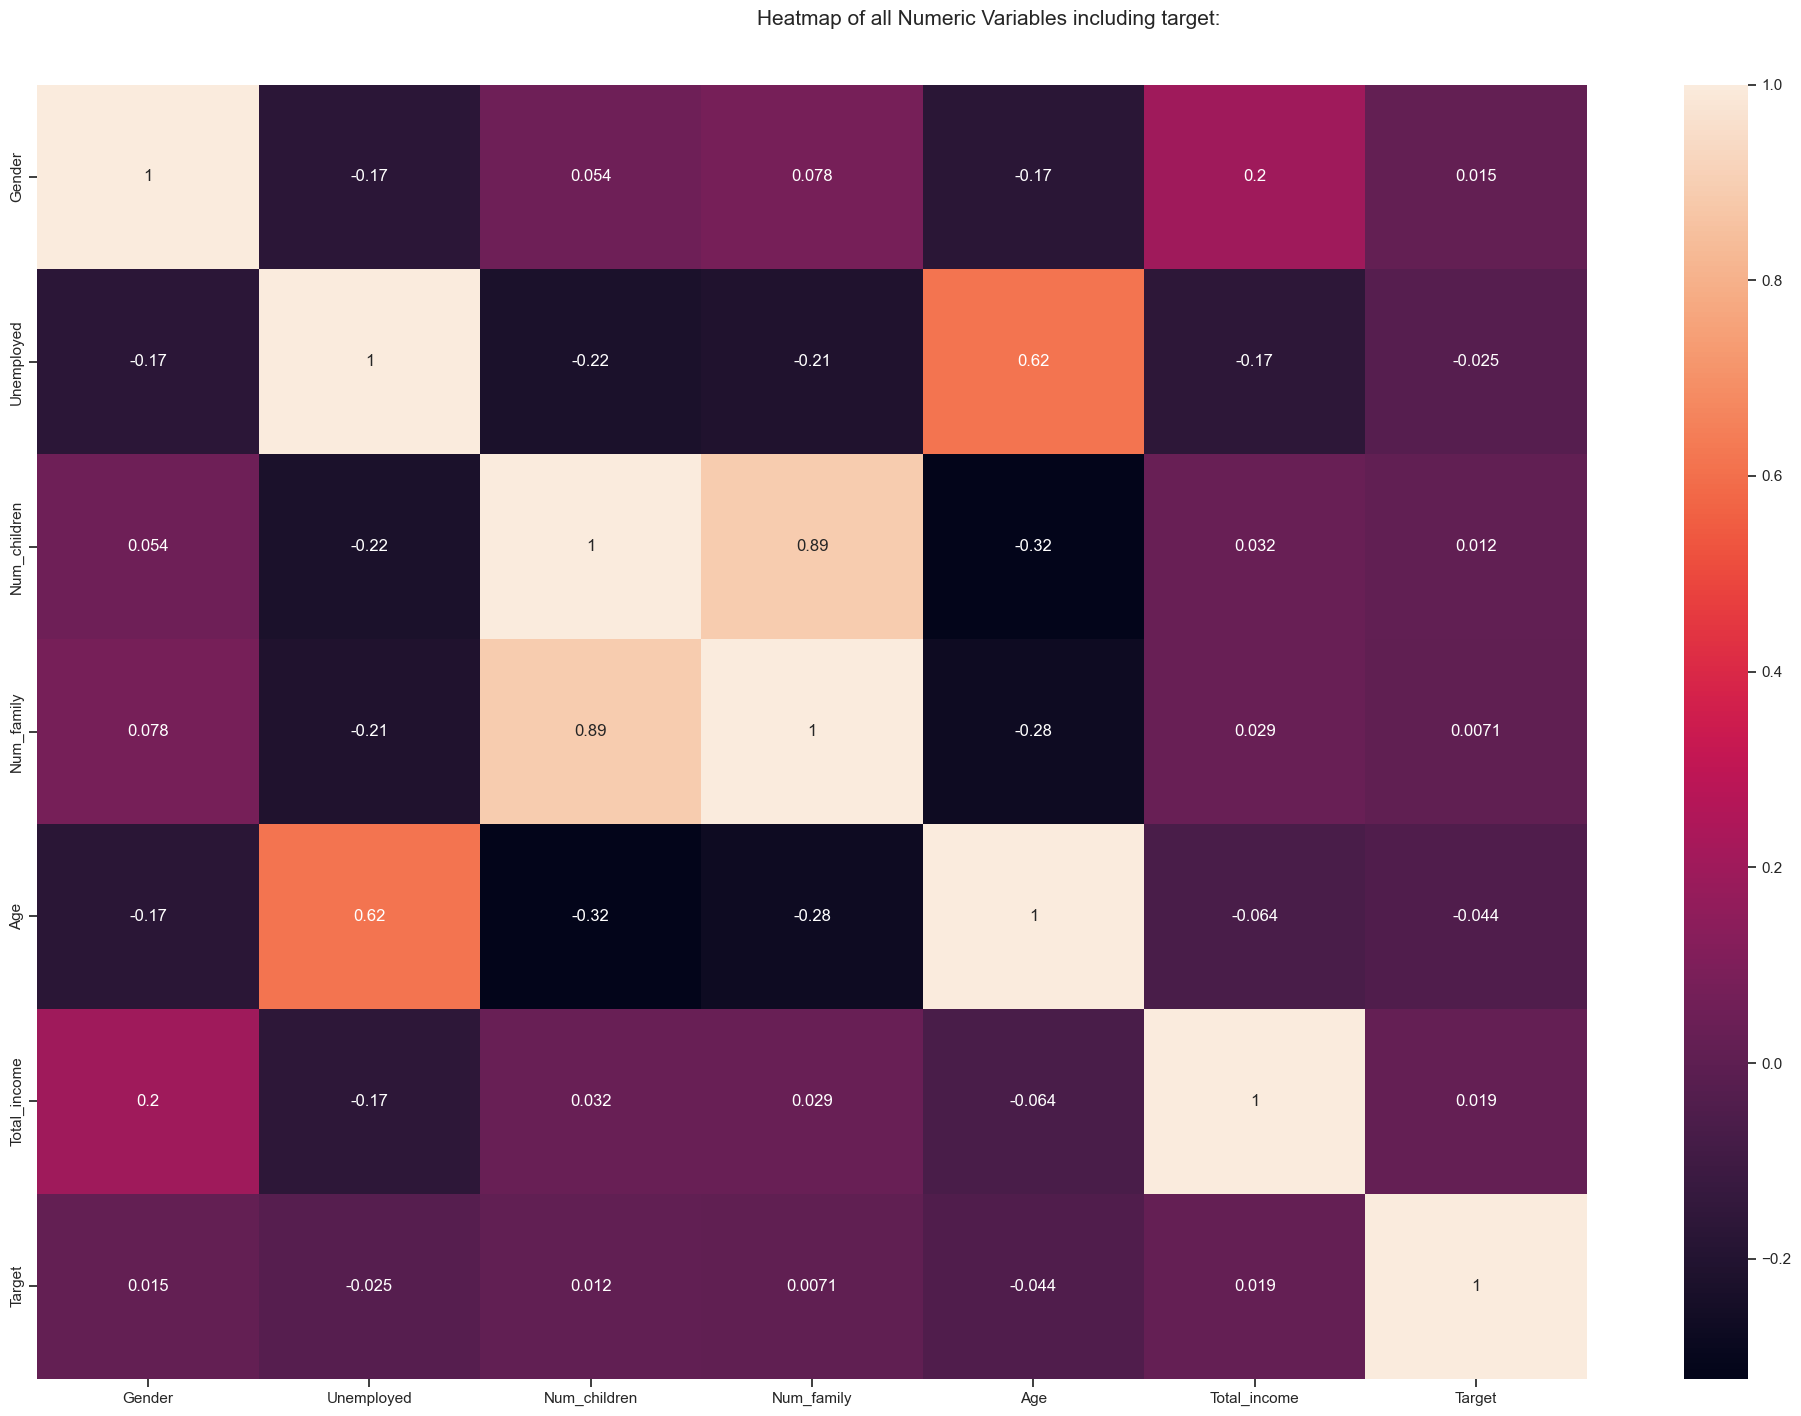

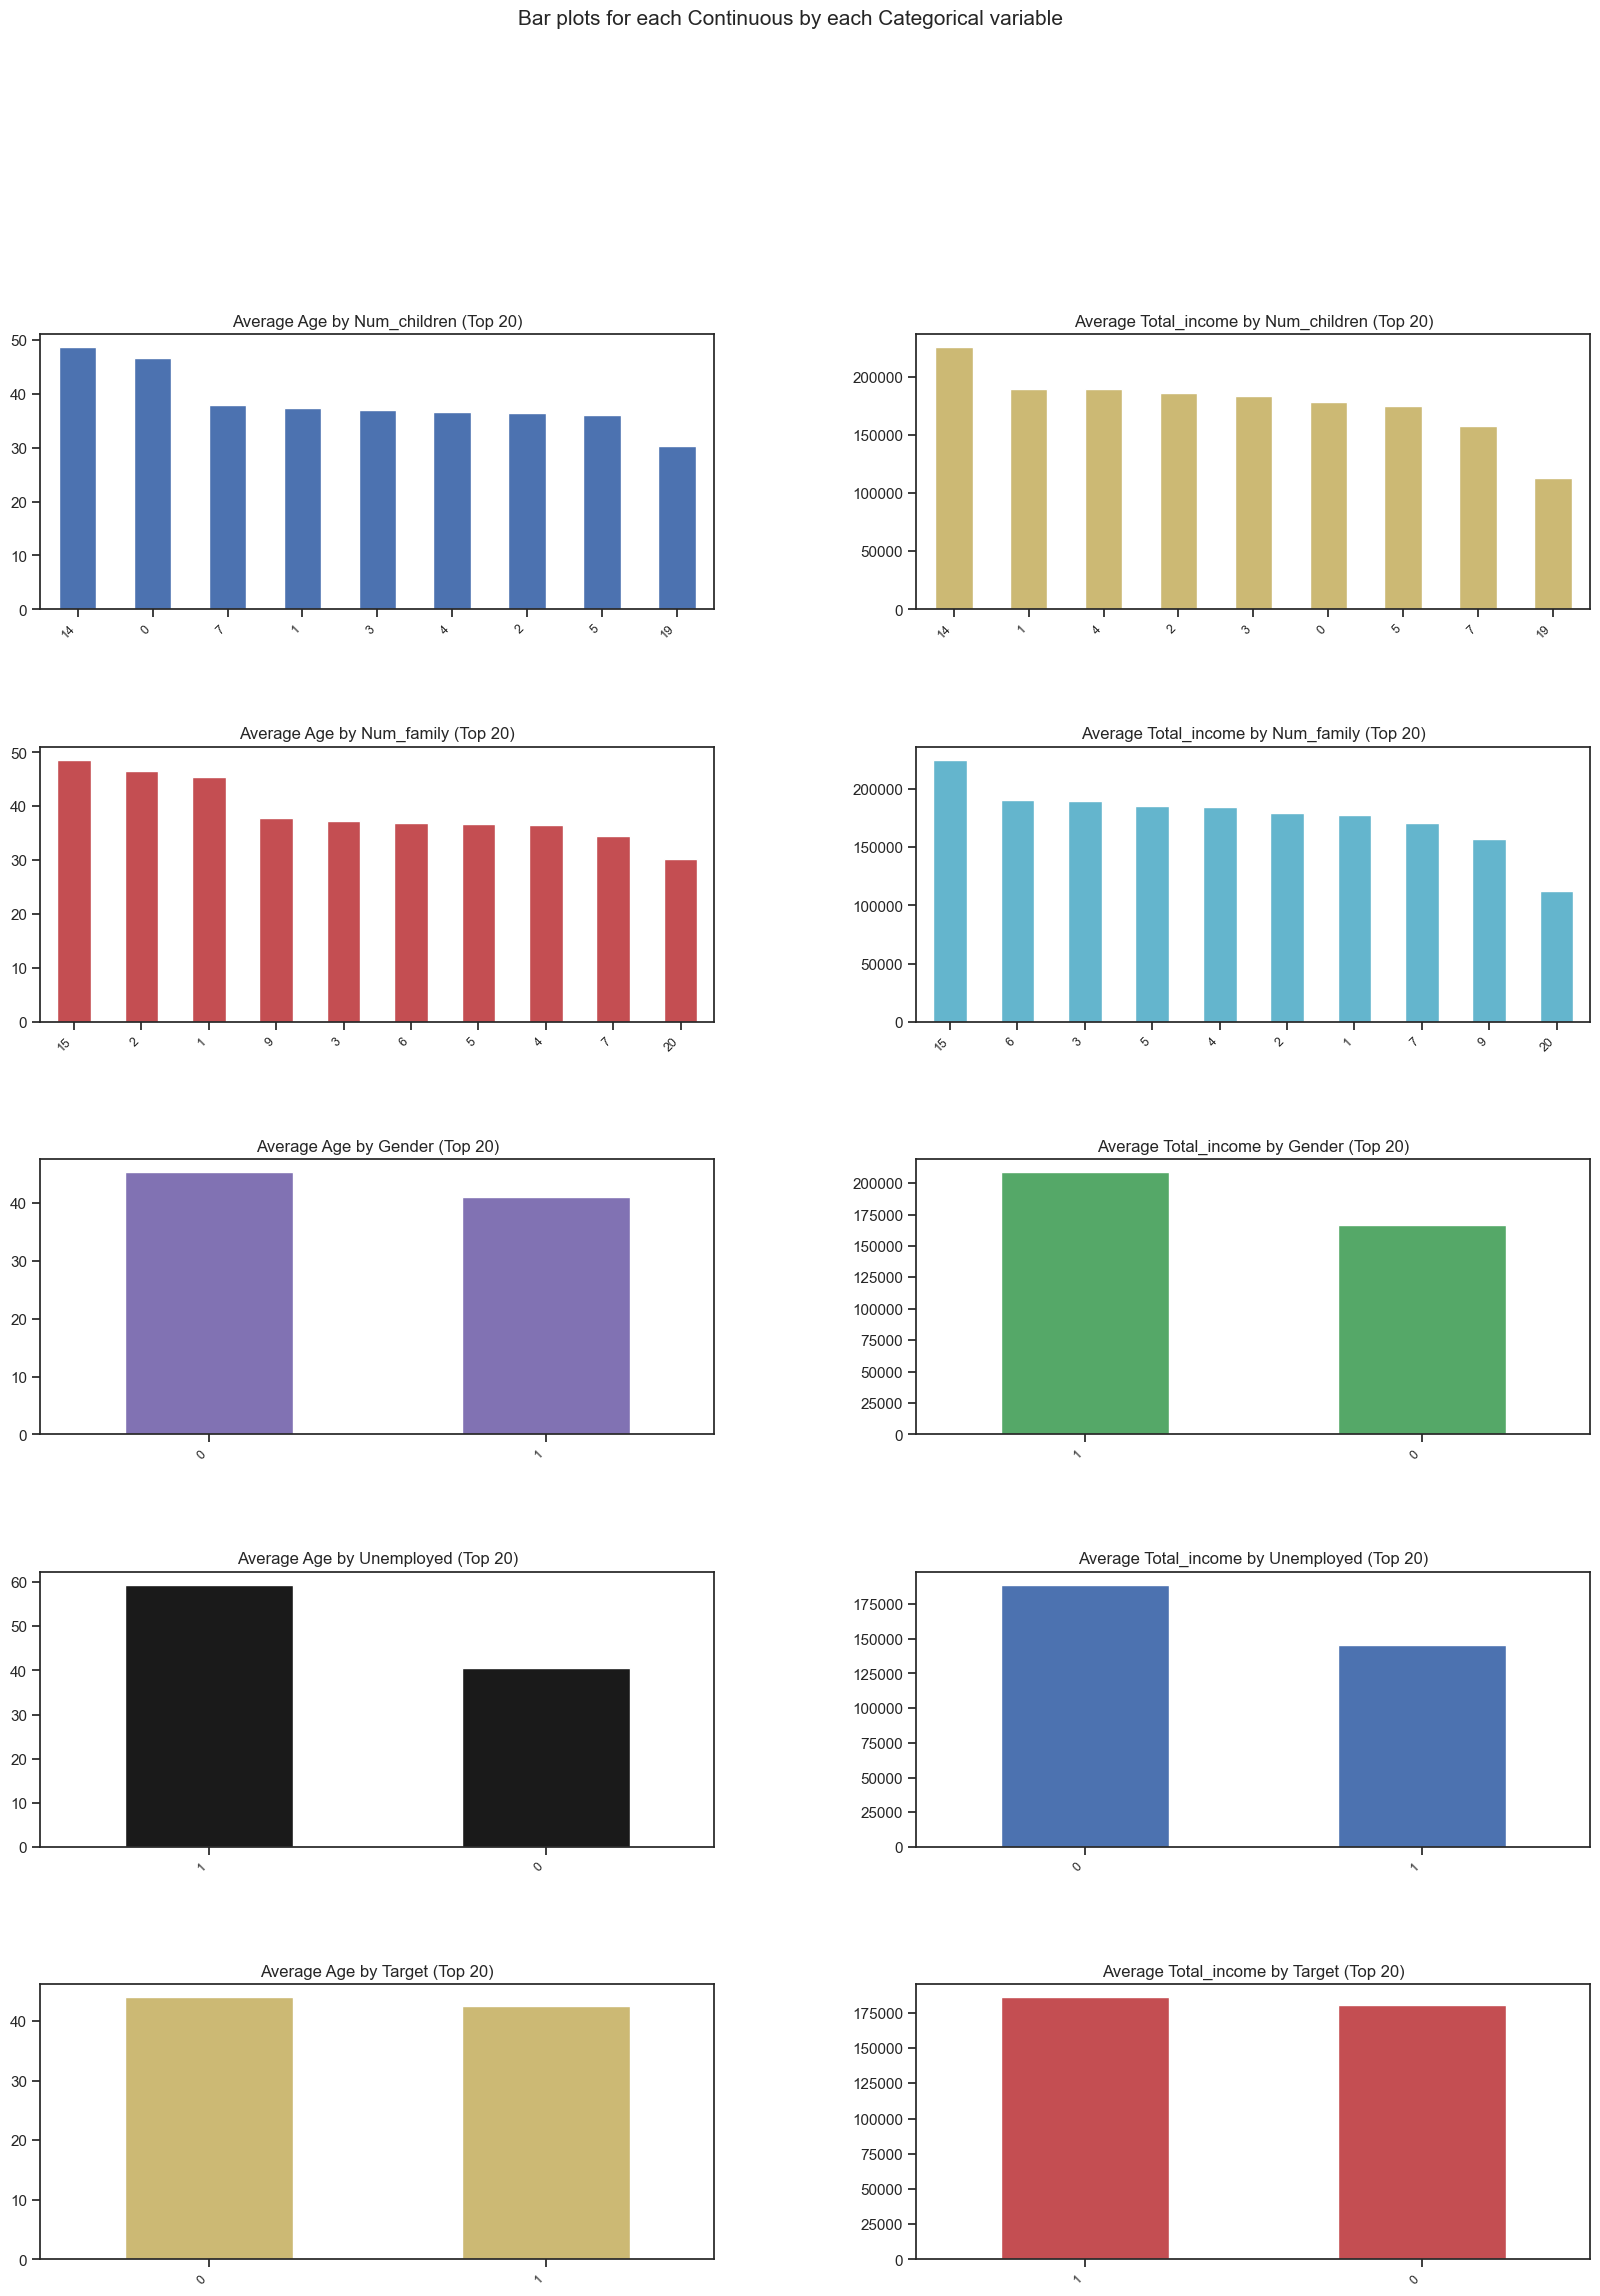

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Gender,Unemployed,Num_children,Num_family,Age,Total_income,Target
0,1,0,0,2,32.868574,427500.0,1
1,1,0,0,2,58.793815,112500.0,0
2,0,0,0,1,52.321403,270000.0,0
3,0,1,0,1,61.504343,283500.0,0
4,1,0,0,2,46.193967,270000.0,0
...,...,...,...,...,...,...,...
9704,0,0,0,2,56.400884,180000.0,1
9705,0,0,0,2,43.360233,112500.0,1
9706,1,0,0,2,52.296762,90000.0,1
9707,0,0,0,2,33.914454,157500.0,1


In [427]:
#Autoviz for selected columns only
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

# Load your dataset
#data = pd.read_csv('/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv')
data = pd.read_csv('dataset.csv')

# Select columns of interest
columns_of_interest = ['Gender', 'Unemployed', 'Num_children', 'Num_family', 'Age','Total_income', 'Target']  # Replace with your desired column names

# Subset the data with selected columns
data_subset = data[columns_of_interest]

# Use AutoViz on the subset of data
AV = AutoViz_Class()
AV.AutoViz(data_subset)

In [428]:
df2.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,2.994000e+03,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2.994000e+03,2994.000000,2994.000000,2994.000000
mean,5.076727e+06,0.357715,0.374749,0.663995,0.216099,0.277889,0.089512,0.160655,0.431864,2.193053,27.971944,1.831012e+05,43.042410,5.596487,0.428524
std,4.102697e+04,0.479408,0.484139,0.472420,0.411651,0.448033,0.285530,0.367273,0.742622,0.918390,16.586736,1.056232e+05,11.637660,6.201390,0.494947
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,21.095573,0.000000,0.000000
25%,5.037042e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,1.125000e+05,33.238191,1.097901,0.000000
50%,5.079054e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,27.000000,1.575000e+05,42.028242,3.797477,0.000000
75%,5.113304e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,52.295393,7.894070,1.000000
max,5.150459e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,9.000000,60.000000,1.575000e+06,68.718728,41.172646,1.000000


In [429]:
columns_to_encode = ["Income_type",
                     "Education_type",
                     "Family_status",
                     "Housing_type",
                     "Occupation_type"
                   ]

In [430]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the label encoder
le = LabelEncoder()

# Copy df data
df_data_label_encoded = df2.copy()

# Fit and transform the label encoder for each column
for column in columns_to_encode:
    df_data_label_encoded[column] = le.fit_transform(df_data_label_encoded[column])

df_data_label_encoded.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
2093,5035848,1,0,1,0,0,0,1,0,1,14,46948.5,57.953278,0.000000,1,4,3,1,12,0
887,5023900,0,0,1,0,0,0,0,0,2,13,225000.0,26.968384,0.673525,0,1,1,1,12,0
9540,5149952,0,0,1,0,0,0,0,1,3,55,67500.0,29.525589,6.877622,0,1,1,1,3,0
8843,5139739,1,0,1,0,1,1,0,0,2,6,202500.0,26.481037,7.266405,4,1,1,5,12,0
1034,5024663,0,0,1,1,1,0,0,0,2,28,157500.0,39.494309,12.506759,4,4,1,1,8,0


In [431]:
df_data_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 2093 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2994 non-null   int64  
 1   Gender           2994 non-null   int64  
 2   Own_car          2994 non-null   int64  
 3   Own_property     2994 non-null   int64  
 4   Work_phone       2994 non-null   int64  
 5   Phone            2994 non-null   int64  
 6   Email            2994 non-null   int64  
 7   Unemployed       2994 non-null   int64  
 8   Num_children     2994 non-null   int64  
 9   Num_family       2994 non-null   int64  
 10  Account_length   2994 non-null   int64  
 11  Total_income     2994 non-null   float64
 12  Age              2994 non-null   float64
 13  Years_employed   2994 non-null   float64
 14  Income_type      2994 non-null   int32  
 15  Education_type   2994 non-null   int32  
 16  Family_status    2994 non-null   int32  
 17  Housing_type    

Caegorical Variables : Income_type, Education_type,Family_status,                   Housing_type, Occupation_type

In [432]:
columns_to_encode = ["Income_type",
                     "Education_type",
                     "Family_status",
                     "Housing_type",
                     "Occupation_type"
                   ]

In [433]:
# from sklearn.preprocessing import OneHotEncoder

# # Set up the OneHotEncoder so it will transform to Pandas
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# ohe.set_output(transform="pandas")

# # Fit and transform the OneHotEncoder to the columns to encode
# data_ohe = ohe.fit_transform(df[columns_to_encode])
# data_ohe.head()

In [434]:
# Split into training and testing sets
X = df_data_label_encoded.drop(columns = 'Target')
y = df_data_label_encoded['Target'].values.reshape(-1, 1)



In [435]:
# Import the PCA module
from sklearn.decomposition import PCA
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=5)
# Fit the PCA model on the transformed credit card DataFrame
X = pca.fit_transform(X)

In [436]:
sum(pca.explained_variance_ratio_)

0.9999999980042475

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [438]:
len(y)

2994

In [439]:
# Find the percentage of rows missing values in each column
#X_train.isna().sum()/len(df2)

In [440]:
from sklearn.preprocessing import StandardScaler
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.44802721,  0.34985908,  0.66328304, -0.19379945,  0.52445692],
       [ 0.39191121,  1.17981011, -0.52779173, -0.6220597 , -0.17183155],
       [ 0.39133142,  0.34711056,  0.49347499, -1.48179722, -0.25646586],
       ...,
       [ 1.2311242 ,  0.9678935 ,  1.6378142 , -0.0983232 ,  1.05298838],
       [ 0.302754  , -0.29135671,  1.04433586, -1.52233068, -0.5593416 ],
       [-0.44742966,  1.20805267,  1.84413027, -0.15691195, -0.8540087 ]])

In [441]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.78455629, -0.77735001,  0.21907085,  0.44252746,  0.89359701],
       [-0.86763195,  0.45833998,  0.48963805, -1.42574208,  0.28774261],
       [ 2.07045499,  0.92517344, -0.56325929,  2.13762537, -1.05858438],
       ...,
       [ 0.22432701,  1.59329007, -0.69622519, -0.99068974, -0.70113165],
       [ 0.39040761, -0.9796517 ,  1.91447559, -0.35666898,  0.52161812],
       [-0.99315989,  0.99855434, -0.54078089, -1.26100636, -0.37961526]])

## Model and Fit to a Logistic Regression Classifier

In [442]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [443]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5723830734966593
Testing Data Score: 0.5807743658210948


In [444]:
# Make predictions on the test data
predictions_lr = lr_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_lr, labels = [1,0]))

[[123 181]
 [180 265]]


In [445]:
# Create a classification report
print("Linar Regression Classiciation Report")
print(classification_report(y_test, predictions_lr, labels = [1, 0]))

Linar Regression Classiciation Report
              precision    recall  f1-score   support

           1       0.41      0.40      0.41       304
           0       0.59      0.60      0.59       445

    accuracy                           0.52       749
   macro avg       0.50      0.50      0.50       749
weighted avg       0.52      0.52      0.52       749



In [446]:
# Predict values with probabilities
pred_probas = lr_model.predict_proba(X_test)

# Print the probabilities
pred_probas

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       ...,
       [1.00000000e+000, 1.15314497e-301],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

In [447]:
# Each prediction includes a prediction for both the 0 class and the 1 class
# We only need the predictions for the 1 class; use a list comprehension to 
# gather the second value from each list

pred_probas_firsts = [prob[1] for prob in pred_probas]

# Print the first 5 probabilities
pred_probas_firsts[0:5]

[0.0, 0.0, 1.0, 0.0, 1.0]

In [448]:
# Calculate the roc_auc_score
print(roc_auc_score(y_test, pred_probas_firsts))

0.5020771732702544


## Model and Fit to a Support Vector Machine

In [449]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='poly')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [450]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5723830734966593
Testing Data Score: 0.6034712950600801


In [451]:
# Make predictions on the test data
predictions_svm = svm_model.predict(X)

# Create a confusion matrix
print(confusion_matrix(y, predictions_svm, labels = [1,0]))

[[ 503  780]
 [ 658 1053]]


In [452]:
# Create a classification report
print("Support Vector Machine Classiciation Report")
print(classification_report(y, predictions_svm, labels = [1, 0]))

Support Vector Machine Classiciation Report
              precision    recall  f1-score   support

           1       0.43      0.39      0.41      1283
           0       0.57      0.62      0.59      1711

    accuracy                           0.52      2994
   macro avg       0.50      0.50      0.50      2994
weighted avg       0.51      0.52      0.52      2994



In [453]:
x1=[I[4] for I in X]


In [454]:
x2=[I[3] for I in X]

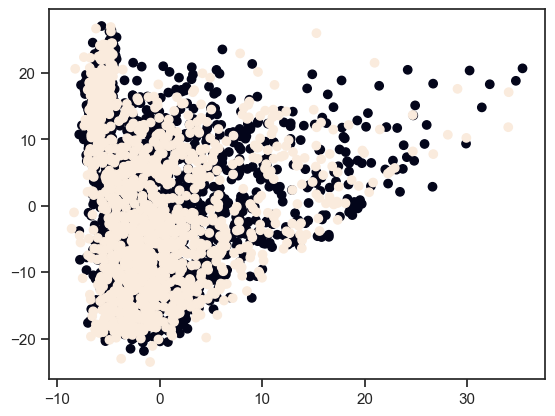

In [455]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x1,x2,c=y)
plt.show()

In [456]:
print (y)
print(predictions_svm)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
[0 1 0 ... 0 0 0]


## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.526
k: 3, Train/Test Score: 0.763/0.561
k: 5, Train/Test Score: 0.706/0.549
k: 7, Train/Test Score: 0.676/0.543
k: 9, Train/Test Score: 0.657/0.545
k: 11, Train/Test Score: 0.638/0.543
k: 13, Train/Test Score: 0.637/0.557
k: 15, Train/Test Score: 0.638/0.551
k: 17, Train/Test Score: 0.633/0.563
k: 19, Train/Test Score: 0.620/0.565


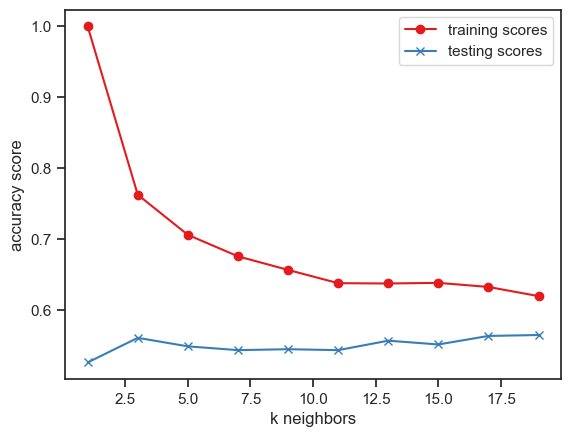

In [457]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [458]:
# Create the KNN model with 13 neighbors
knn_model = KNeighborsClassifier(n_neighbors=13)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [459]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6374164810690424
Testing Data Score: 0.5567423230974633


In [460]:
# Make predictions on the test data
predictions_knn = knn_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_knn, labels = [1,0]))

[[210  94]
 [296 149]]


In [461]:
# Create a classification report
print("KNN Classiciation Report")
print(classification_report(y_test, predictions_knn, labels = [1, 0]))

KNN Classiciation Report
              precision    recall  f1-score   support

           1       0.42      0.69      0.52       304
           0       0.61      0.33      0.43       445

    accuracy                           0.48       749
   macro avg       0.51      0.51      0.48       749
weighted avg       0.53      0.48      0.47       749



## Model and Fit to a Decision Tree Classifier

In [462]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(max_depth=6)

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6)

In [463]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6160356347438752
Testing Data Score: 0.5794392523364486


In [464]:
# Make predictions on the test data
predictions_dt = dt_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_dt, labels = [1,0]))

[[182 122]
 [264 181]]


In [465]:
# Create a classification report
print("Decision Tree Classiciation Report")
print(classification_report(y_test, predictions_dt, labels = [1, 0]))

Decision Tree Classiciation Report
              precision    recall  f1-score   support

           1       0.41      0.60      0.49       304
           0       0.60      0.41      0.48       445

    accuracy                           0.48       749
   macro avg       0.50      0.50      0.48       749
weighted avg       0.52      0.48      0.48       749



## Model and Fit to a Random Forest Classifier

In [466]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
#rf_model = RandomForestClassifier(n_estimators=128, random_state=1)
rf_model = RandomForestClassifier(n_estimators=500,max_depth=6,random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500, random_state=1)

In [467]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6917594654788418
Testing Data Score: 0.582109479305741


In [468]:
# Make predictions on the test data
predictions_rfc = dt_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_rfc, labels = [1,0]))

[[182 122]
 [264 181]]


In [469]:
# Create a classification report
print("Random Forest Classiciation Report")
print(classification_report(y_test, predictions_rfc, labels = [1, 0]))

Random Forest Classiciation Report
              precision    recall  f1-score   support

           1       0.41      0.60      0.49       304
           0       0.60      0.41      0.48       445

    accuracy                           0.48       749
   macro avg       0.50      0.50      0.48       749
weighted avg       0.52      0.48      0.48       749



## Model and Fit to a Gradient Boosting Classifier

In [470]:
# Train the Gradient Boosting classifier
gfc = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {gfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {gfc.score(X_test_scaled, y_test)}')

Training Score: 0.7229398663697104
Testing Score: 0.57543391188251


In [471]:
# Make predictions on the test data
predictions_gfc = gfc.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_gfc, labels = [1,0]))

[[201 103]
 [282 163]]


In [472]:
# Create a classification report
print("Gradient Boosting Classiciation Report")
print(classification_report(y_test, predictions_gfc, labels = [1, 0]))

Gradient Boosting Classiciation Report
              precision    recall  f1-score   support

           1       0.42      0.66      0.51       304
           0       0.61      0.37      0.46       445

    accuracy                           0.49       749
   macro avg       0.51      0.51      0.48       749
weighted avg       0.53      0.49      0.48       749

